In [2]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [3]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import  pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

font = { 'family': 'DejaVu Sans',
    'weight' : "normal",
        'size'   : 22}
plt.rc('font', **font)
# import pydoop.hdfs as hd
# with hd.open("/home/file.csv") as f:
#     print f.read()

In [314]:
# df= spark.read.csv("hdfs://namenode:9000/nifi/confirm2022-01-0610-46-07.csv")
confirmed = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/confirm{}.csv".format(str(date.today()))).toPandas()
recovered = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/recovered{}.csv".format(str(date.today()))).toPandas()
death = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/death{}.csv".format(str(date.today()))).toPandas()
recovered


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22
0,None,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,None,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,None,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,None,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,None,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
confirmed = confirmed.drop('Province/State', 1)
confirmed = confirmed.drop('Lat', 1)
confirmed = confirmed.drop('Long', 1)
recovered = recovered.drop('Province/State', 1)
recovered = recovered.drop('Lat', 1)
recovered = recovered.drop('Long', 1)
death = death.drop('Province/State', 1)
death = death.drop('Lat', 1)
death = death.drop('Long', 1)
confirmed=confirmed.astype(dict.fromkeys(confirmed.columns[1:], 'int64'),errors='ignore')
recovered=recovered.astype(dict.fromkeys(recovered.columns[1:], 'int64'),errors='ignore')
death=death.astype(dict.fromkeys(death.columns[1:], 'int64'),errors='ignore')
confirmed = confirmed.groupby(by=["Country/Region"],as_index=False).sum()
recovered = recovered.groupby(by=["Country/Region"],as_index=False).sum()
death = death.groupby(by=["Country/Region"],as_index=False).sum()
confirmed['Total']=confirmed[confirmed.columns.tolist()[-1]]
recovered['Total']=recovered[recovered.columns.tolist()[-1]]
death['Total']=death[death.columns.tolist()[-1]]

In [312]:
list_days=confirmed.columns.tolist()[1:-1]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1:
        confirmed[list_days[i]]=confirmed[list_days[i]]-confirmed[list_days[i+1]]
list_days=recovered.columns.tolist()[1:-1]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1:
        recovered[list_days[i]]=recovered[list_days[i]]-recovered[list_days[i+1]]
list_days=death.columns.tolist()[1:-1]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1:
        death[list_days[i]]=death[list_days[i]]-death[list_days[i+1]]
recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,Total
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Total confirmed, recovered, death

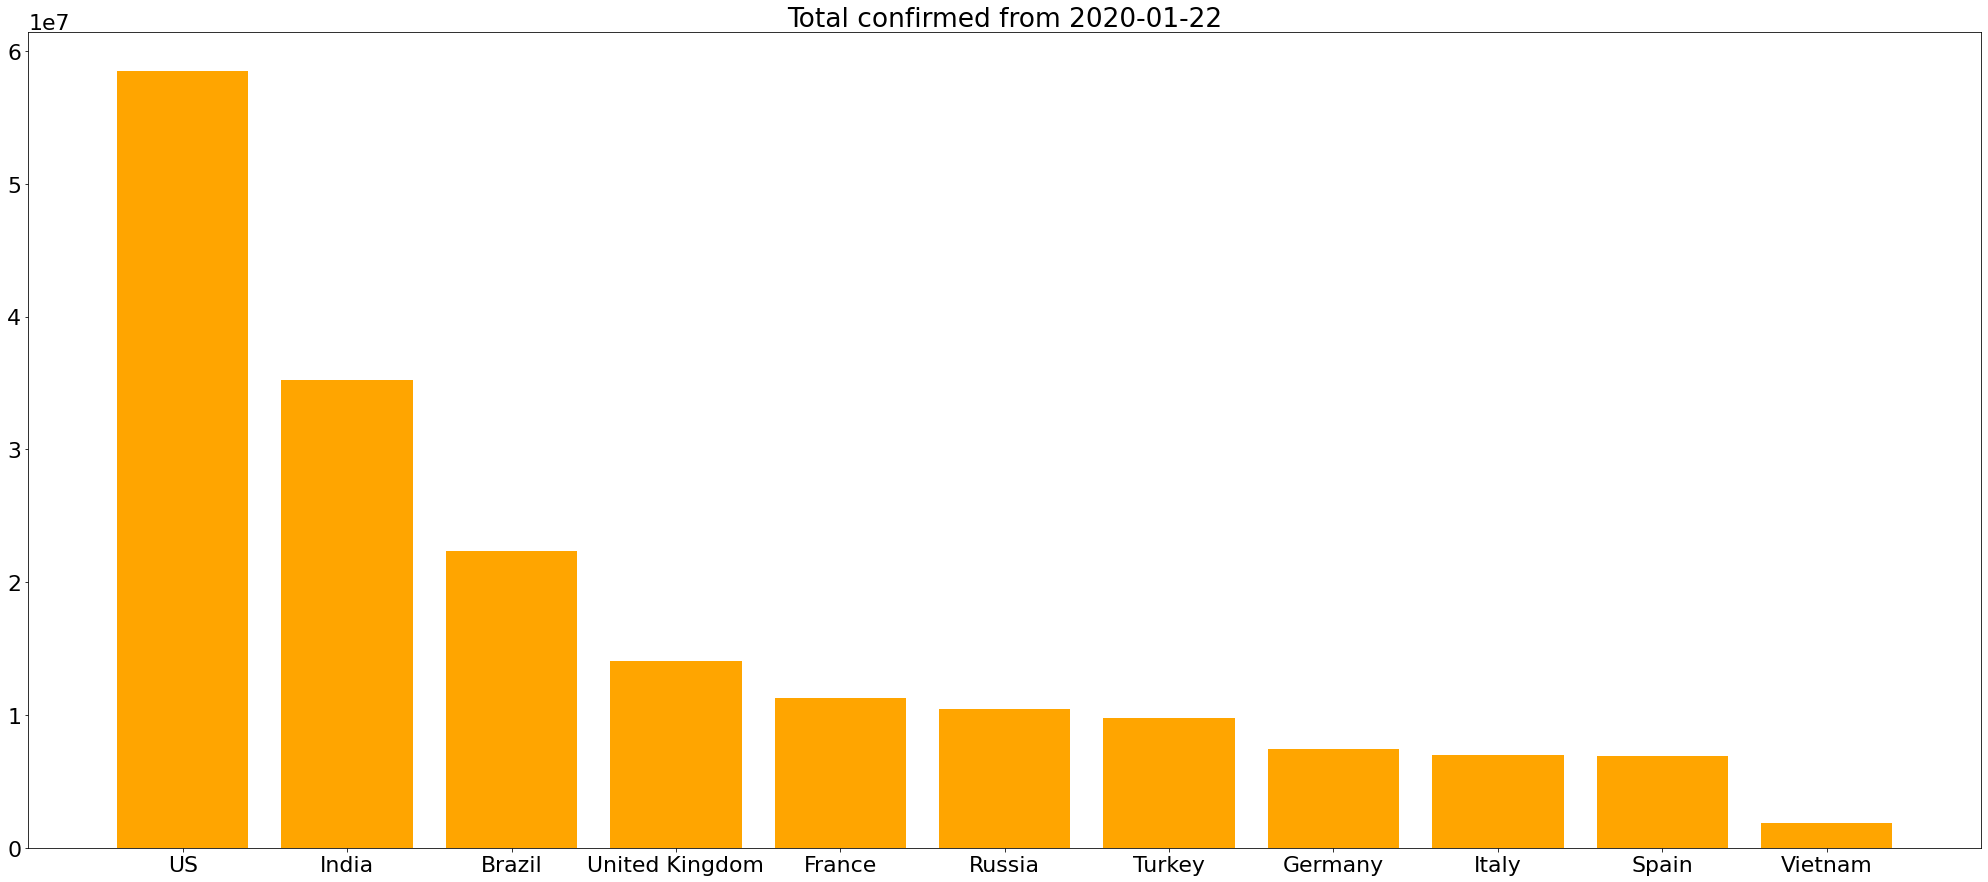

In [275]:
plt.title("Total confirmed from {}".format(pd.to_datetime(confirmed.columns[1]).date()))
df1 = confirmed.sort_values('Total',ascending = False).head(10)
entry = confirmed.loc[confirmed['Country/Region'] == 'Vietnam']
df1 = pd.concat([df1,entry])
plt.rcParams["figure.figsize"]=(30, 15)
# Make a random dataset:
height = df1["Total"]
bars = df1["Country/Region"]
y_pos = np.arange(len(bars))
# df1.set_index('Country/Region')
# sns.barplot(x=df1.index, y=df1["Total"])
# df1
# plt.figure(figsize=(12,12))
# Create bars
plt.bar(y_pos, height, color = 'orange')
# sns.barplot(x=df1.index, y=df1["Total"])
# # Create names on the x-axis
plt.xticks(y_pos, bars)
    
# # Show graphic

plt.show()

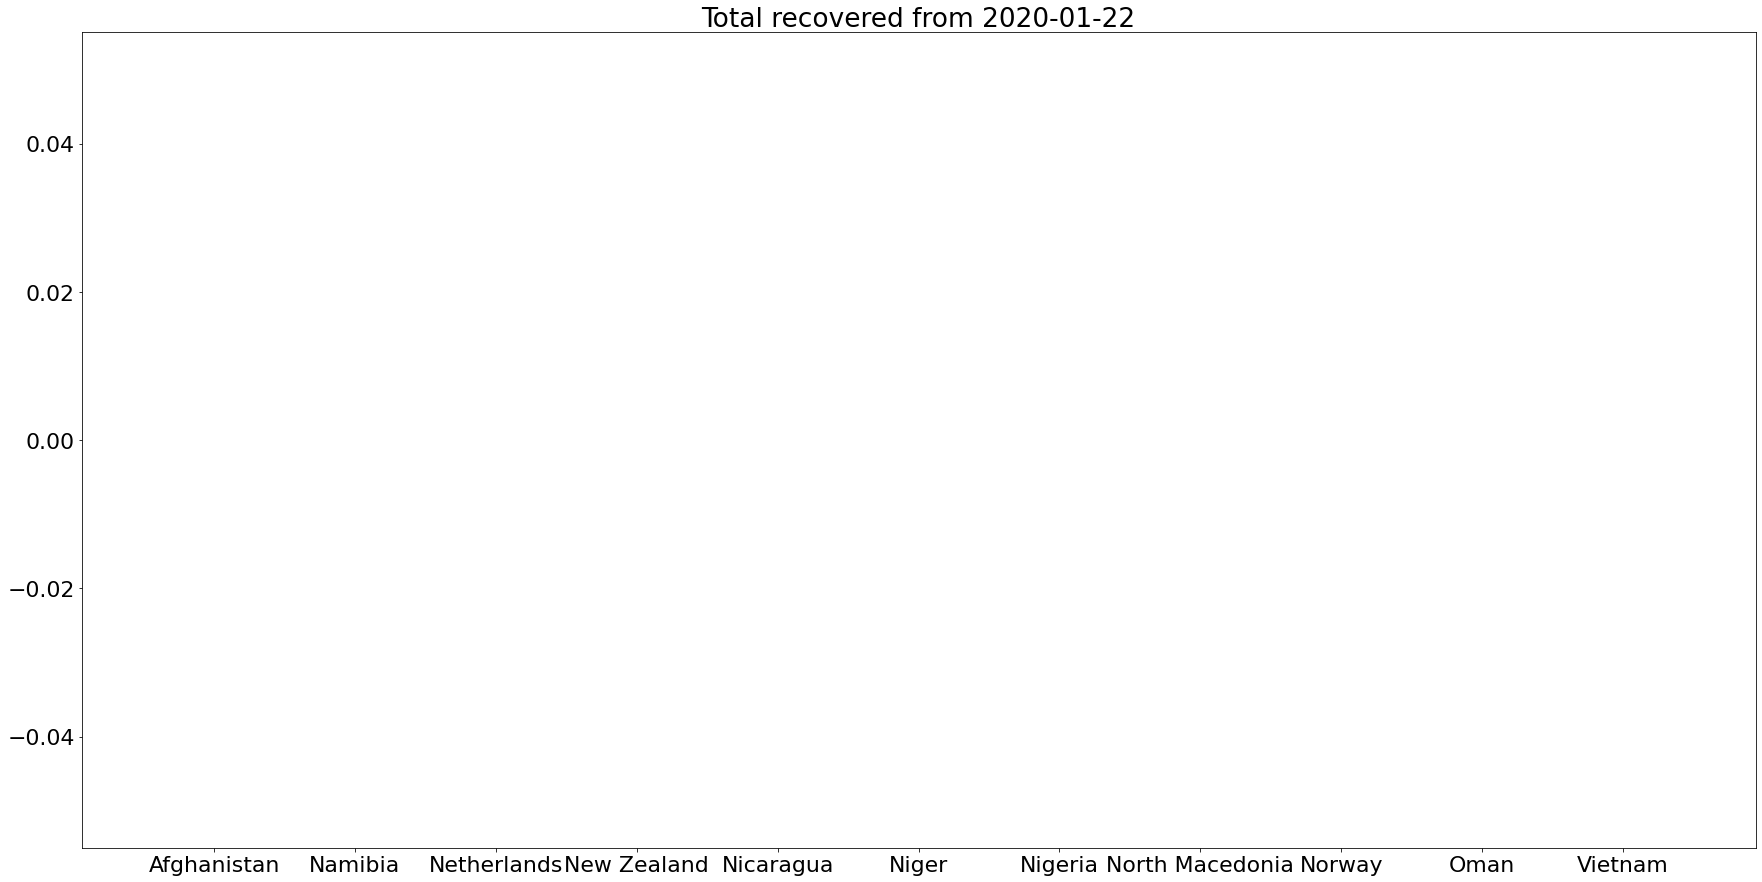

In [276]:
# plt.title("Total recovered from 22/01/2020")
plt.title("Total recovered from {}".format(pd.to_datetime(recovered.columns[1]).date()))
df2 = recovered.sort_values('Total',ascending = False).head(10)
entry = recovered.loc[recovered['Country/Region'] == 'Vietnam']
df2 = pd.concat([df2,entry])

# Make a random dataset:
height = df2["Total"]
bars = df2["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='green')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

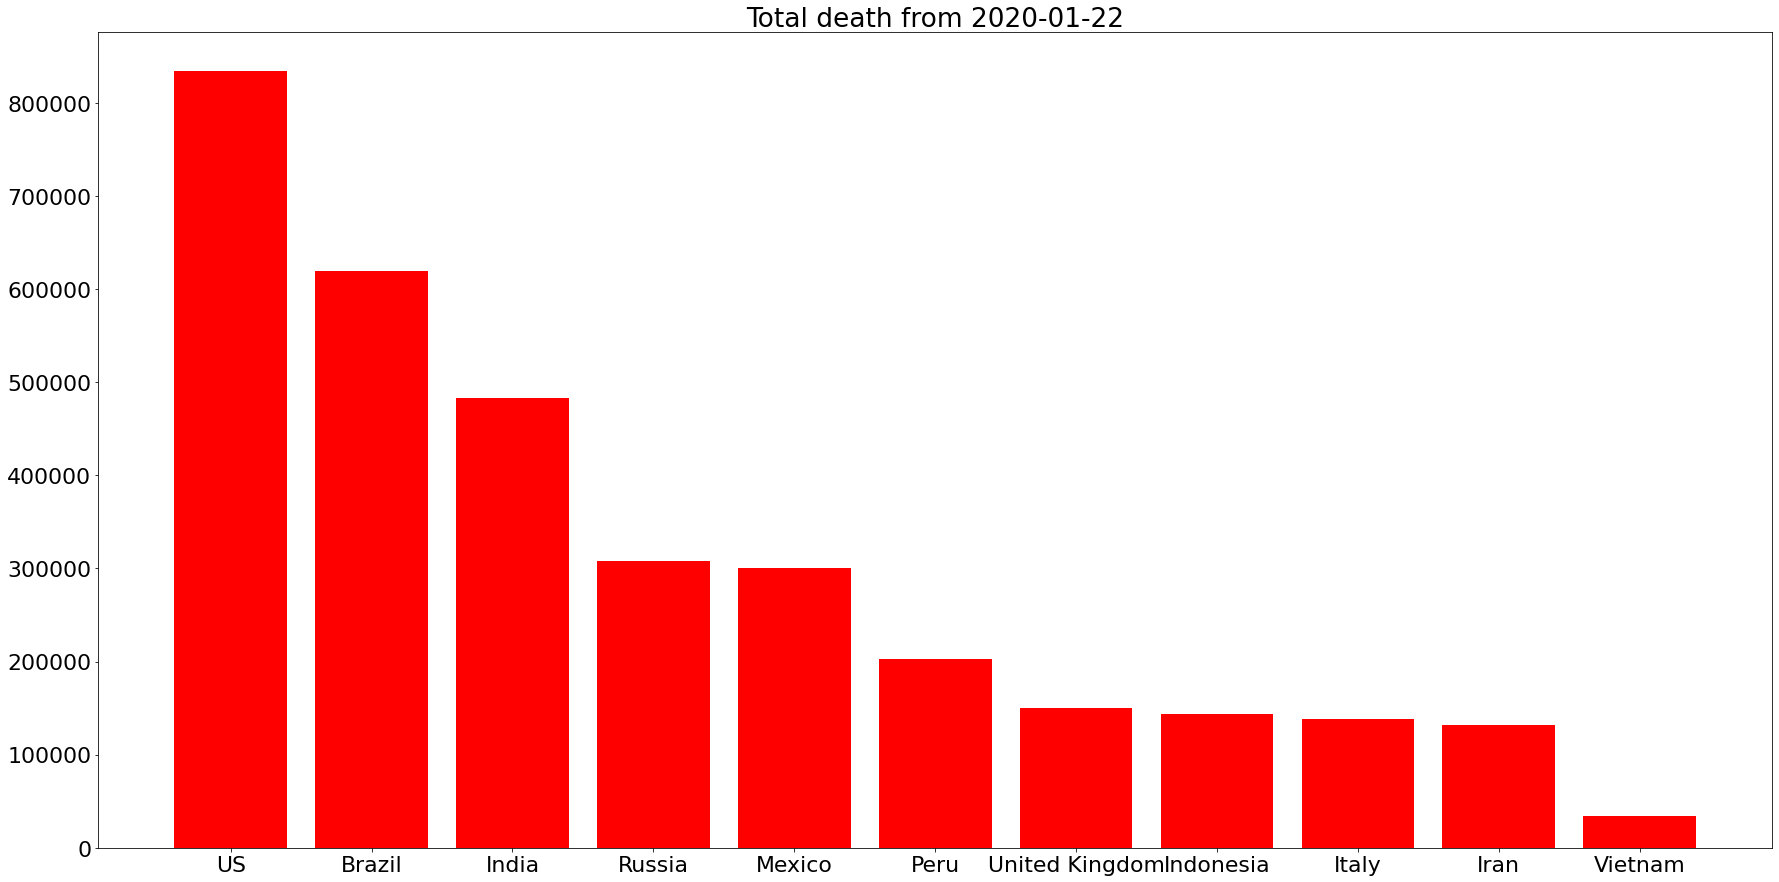

In [277]:
plt.title("Total death from {}".format(pd.to_datetime(death.columns[1]).date()))
df3 = death.sort_values('Total',ascending = False).head(10)
entry = death.loc[death['Country/Region'] == 'Vietnam']
df3 = pd.concat([df3,entry])

# Make a random dataset:
height = df3["Total"]
bars = df3["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'red')

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

In [278]:
df1 = confirmed.sort_values('Total',ascending = False).head(10)
entry = confirmed.loc[confirmed['Country/Region'] == 'Vietnam']
df1 = pd.concat([df1,entry])
df1 = df1.merge(recovered, on='Country/Region', how='inner', suffixes=('', '_recover')).merge(death, on='Country/Region', how='inner', suffixes=('', '_death'))
df1

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/29/21_death,12/30/21_death,12/31/21_death,1/1/22_death,1/2/22_death,1/3/22_death,1/4/22_death,1/5/22_death,1/6/22_death,Total_death
0,US,1,-1,1,-1,3,-3,0,1,-1,...,2197,1412,583,267,244,1688,2157,1986,1870,833988
1,India,0,0,0,0,0,0,0,0,1,...,268,220,406,284,123,124,534,325,302,483178
2,Brazil,0,0,0,0,0,0,0,0,0,...,117,154,85,33,34,72,181,0,0,619654
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,58,336,203,155,73,43,50,344,232,149993
4,France,0,0,2,-1,-1,0,1,0,-1,...,184,182,189,110,91,270,351,246,205,126002
5,Russia,0,0,0,0,0,0,0,0,0,...,903,905,880,825,788,812,810,804,778,307488
6,Turkey,0,0,0,0,0,0,0,0,0,...,0,281,163,145,129,160,137,143,156,83231
7,Germany,0,0,0,0,0,1,2,-3,0,...,613,322,182,46,4,423,345,444,263,113636
8,Italy,0,0,0,0,0,0,0,0,0,...,136,156,155,111,133,140,259,231,198,138474
9,Spain,0,0,0,0,0,0,0,0,0,...,78,74,0,0,0,168,116,148,0,89837


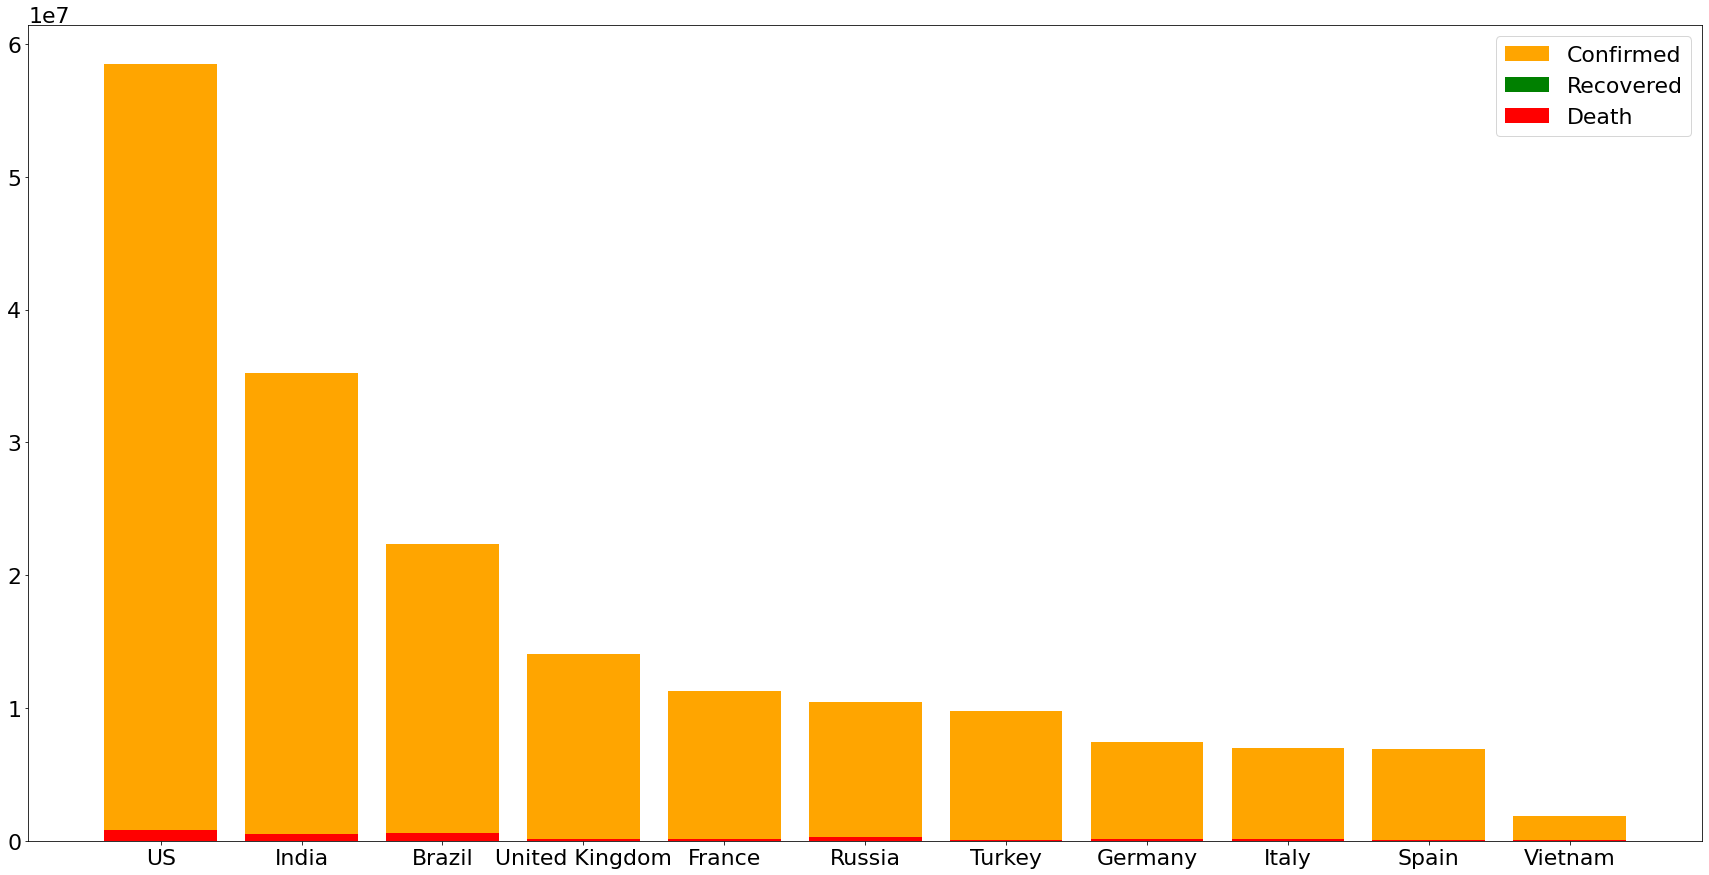

In [279]:
width = 0.8

confirmed_case   = df1['Total']
recovered_case    = df1['Total_recover'] + df1['Total_death']
death_case    = df1['Total_death']

indices = np.arange(len(confirmed_case))
height = df1["Total"]
bars = df1["Country/Region"]
y_pos = np.arange(len(bars))
plt.bar(indices, confirmed_case, width=width, 
        color='orange', label='Confirmed')
plt.bar(indices, recovered_case, width=width, 
        color='g', label='Recovered')
plt.bar(indices, death_case, width=width, 
        color='r', label='Death')


plt.xticks(y_pos, bars)

plt.legend()

plt.show()

# Daily new infections

In [280]:
confirmed_increasement = confirmed
confirmed_increasement = confirmed_increasement.drop('Total', 1)
confirmed_increasement = confirmed_increasement.drop('Country/Region', 1)
confirmed_increasement_temp = confirmed_increasement.copy()
confirmed_increasement_temp2 = confirmed_increasement.copy()
confirmed_increasement_temp2.insert(0, "init", 0)
confirmed_increasement_temp2 = confirmed_increasement_temp2.drop("12/16/21",1)

In [281]:
confirmed_increasement_temp3 = confirmed_increasement_temp.to_numpy() - confirmed_increasement_temp2.to_numpy()
confirmed_increasement = pd.DataFrame(confirmed_increasement_temp3, columns = confirmed.columns[1:-1])
confirmed_increasement["Country/Region"] = confirmed["Country/Region"]

In [282]:
confirmed_increasement['Peak'] = confirmed_increasement.max(numeric_only=True, axis=1)

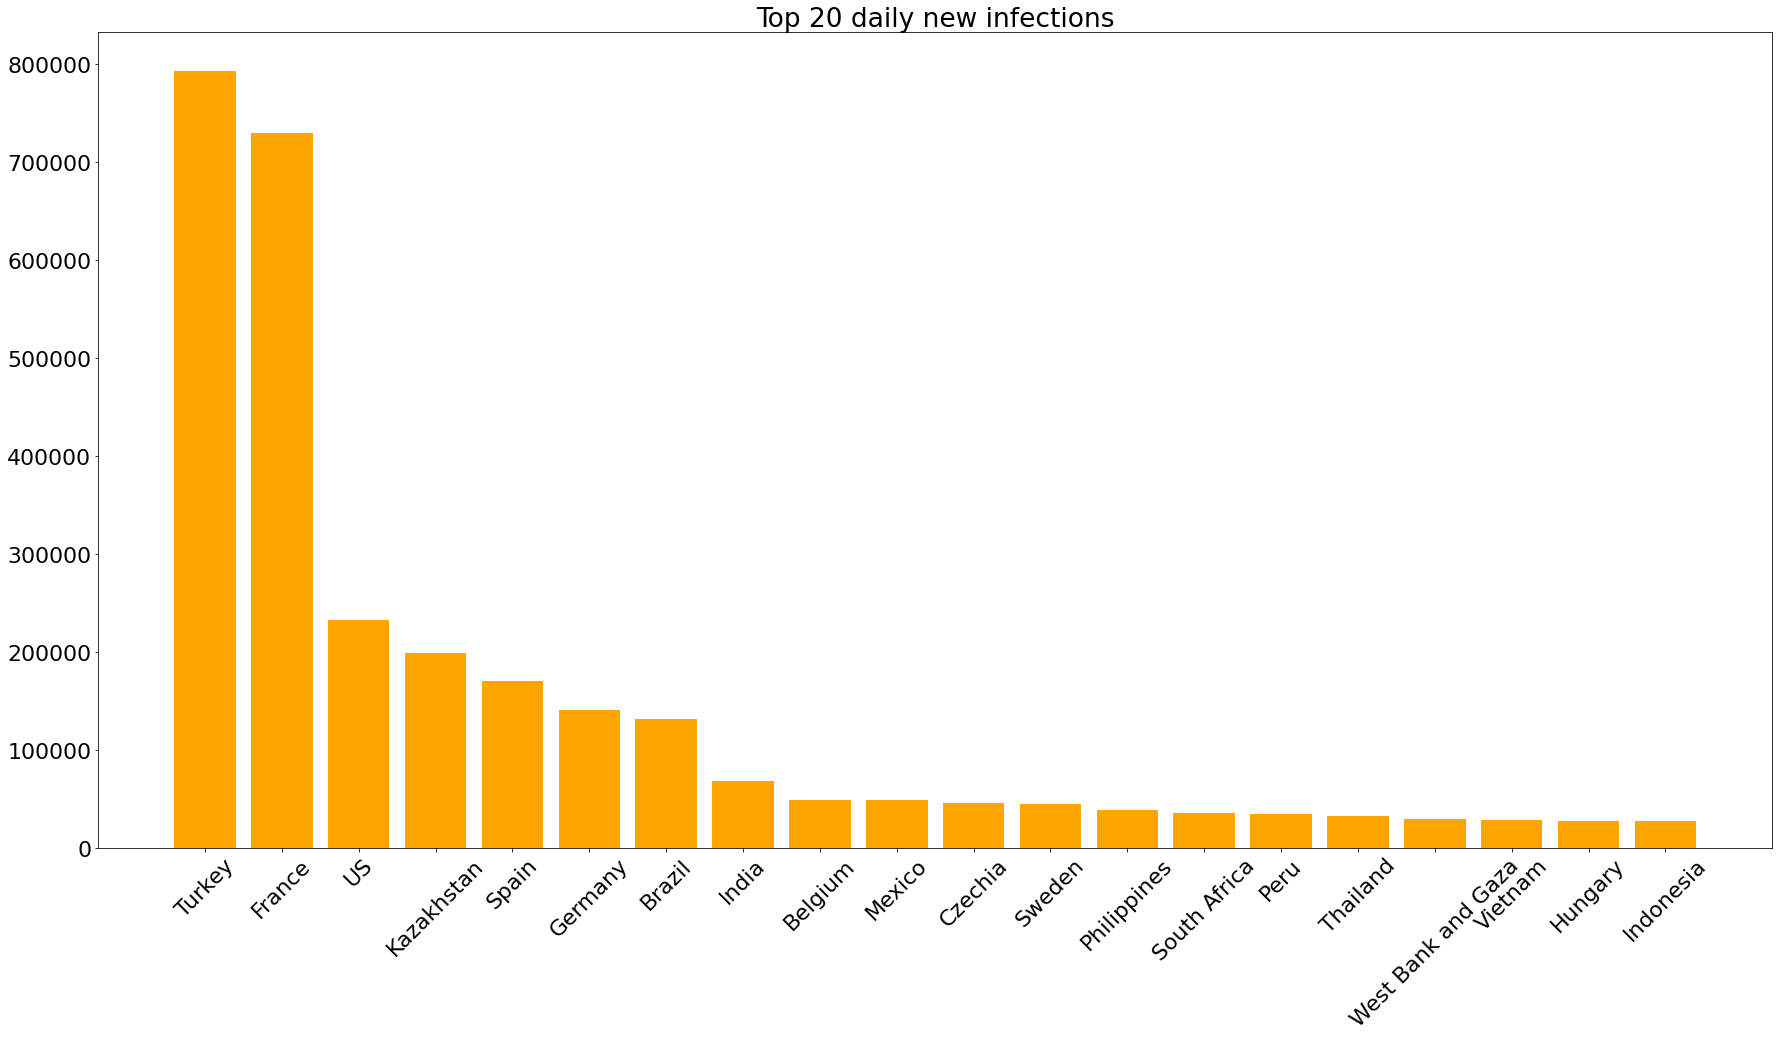

In [283]:
plt.title("Top 20 daily new infections")
df4 = confirmed_increasement.sort_values('Peak',ascending = False).head(20)

# Make a random dataset:
height = df4["Peak"]
bars = df4["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='orange')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

In [284]:
death_increasement = death
death_increasement = death_increasement.drop('Total', 1)
death_increasement = death_increasement.drop('Country/Region', 1)
death_increasement_temp = death_increasement.copy()
death_increasement_temp2 = death_increasement.copy()
death_increasement_temp2.insert(0, "init", 0)
death_increasement_temp2 = death_increasement_temp2.drop("12/16/21",1)
death_increasement_temp3 = death_increasement_temp.to_numpy() - death_increasement_temp2.to_numpy()
death_increasement = pd.DataFrame(death_increasement_temp3, columns = confirmed.columns[1:-1])
death_increasement["Country/Region"] = death["Country/Region"]
death_increasement['Peak'] = death_increasement.max(numeric_only=True, axis=1)

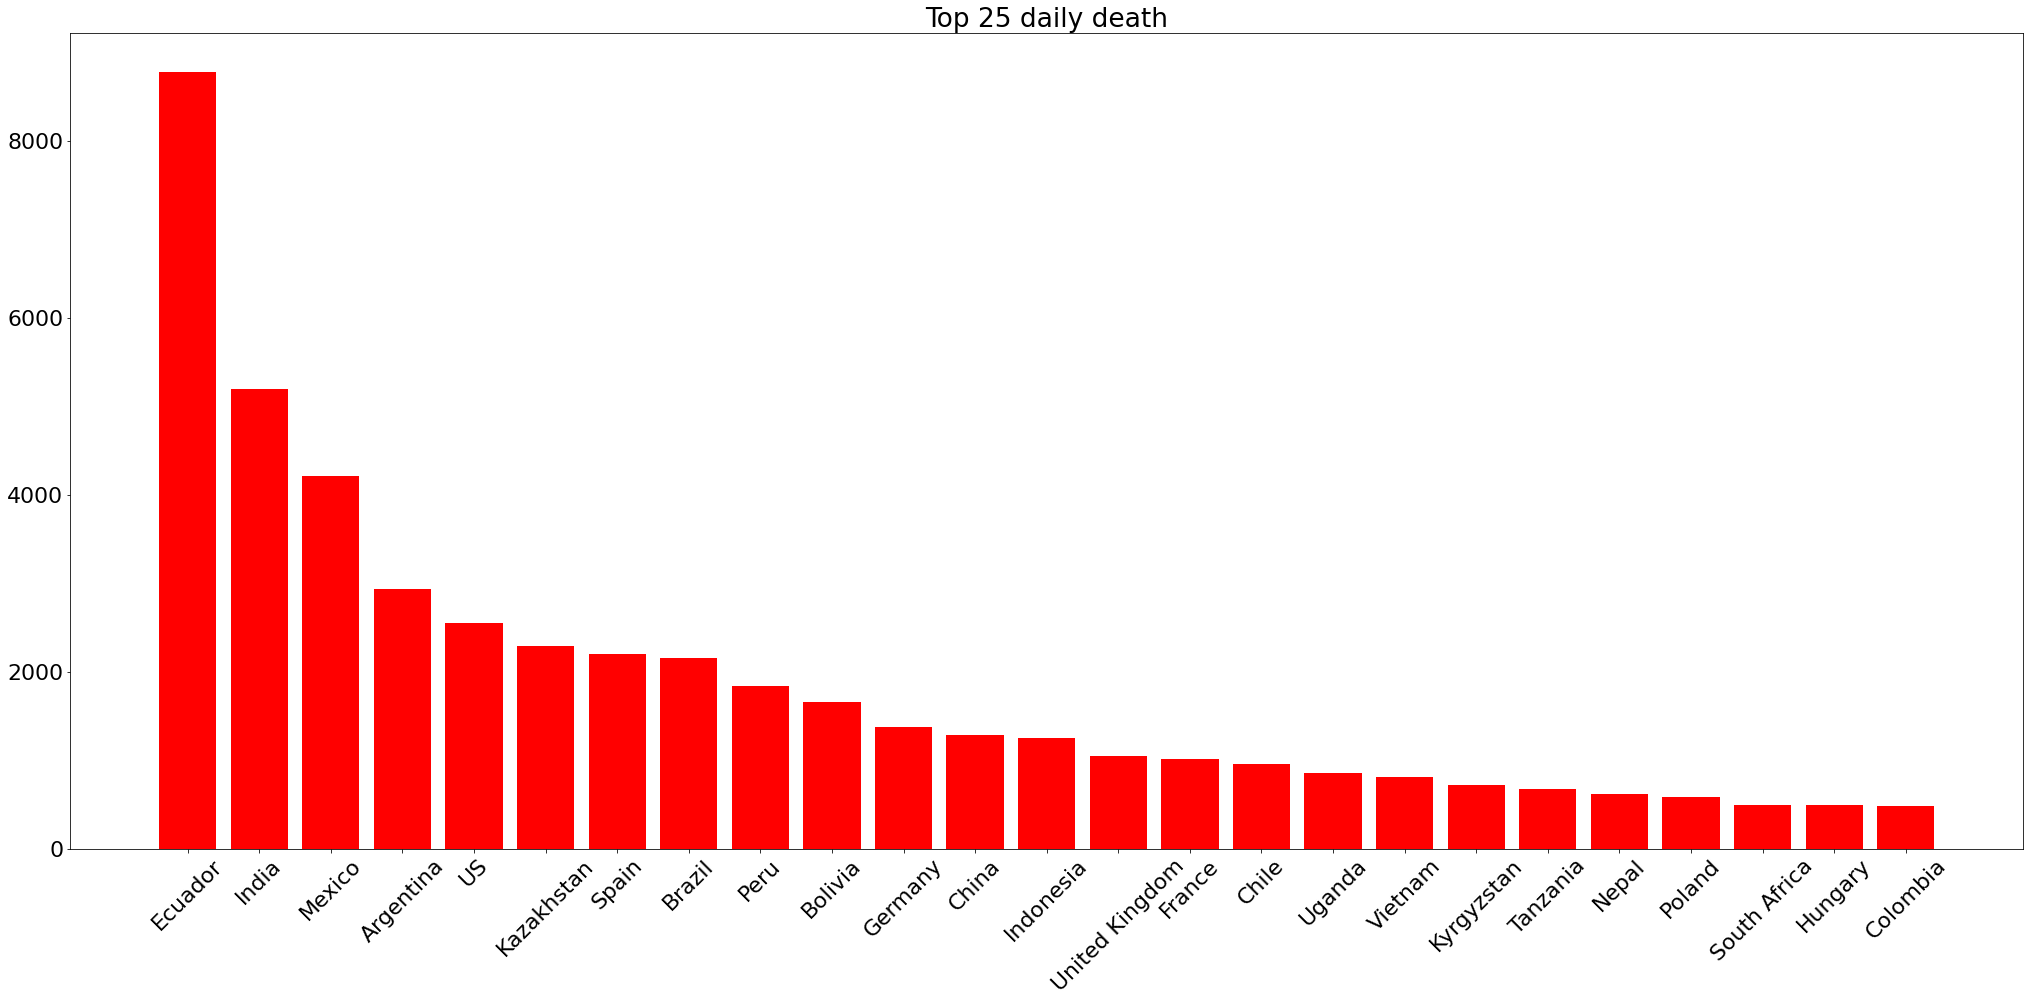

In [285]:
plt.title("Top 25 daily death")
df5 = death_increasement.sort_values('Peak',ascending = False).head(25)

# Make a random dataset:
height = df5["Peak"]
bars = df5["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color='red')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

# Rate of infection

In [286]:
population = pd.read_csv("2021_population.csv")
population["country"] = population["country"].replace("United States", 'US')
population

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,457,218","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,399,624,139","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,US,"333,814,400","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,679,665","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,185,914","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [287]:
population.rename(columns={"country": ""})

,iso_code,,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,457,218","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,399,624,139","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,US,"333,814,400","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,679,665","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,185,914","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [288]:
confirmed_population = pd.merge(confirmed, population, left_on='Country/Region', right_on='country')

In [289]:
confirmed_population["2021_last_updated"] = confirmed_population["2021_last_updated"].str.replace(',','' )
confirmed_population['2021_last_updated'] = pd.to_numeric(confirmed_population['2021_last_updated'])
confirmed_population["confirmed_rate"] = confirmed_population["Total"]/confirmed_population["2021_last_updated"]*100

In [290]:
confirmed_population

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank,confirmed_rate
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,AFG,Afghanistan,40259578,"38,928,346","652,230 sq_km",61/sq_km,2.33%,0.51%,37,0.393136
1,Albania,0,0,0,0,0,0,0,0,0,...,ALB,Albania,2870390,"2,877,797","28,748 sq_km",100/sq_km,-0.17%,0.04%,140,7.429548
2,Algeria,0,0,0,0,0,0,0,0,0,...,DZA,Algeria,44966861,"43,851,044","2,381,741 sq_km",19/sq_km,1.75%,0.57%,34,0.491084
3,Andorra,0,0,0,0,0,0,0,0,0,...,AND,Andorra,77355,"77,265",468 sq_km,165/sq_km,0.12%,0.00%,202,32.692134
4,Angola,0,0,0,0,0,0,0,0,0,...,AGO,Angola,34431164,"32,866,272","1,246,700 sq_km",27/sq_km,3.25%,0.43%,43,0.254493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Venezuela,0,0,0,0,0,0,0,0,0,...,VEN,Venezuela,28813450,"28,435,940","916,445 sq_km",31/sq_km,0.95%,0.36%,50,1.546778
169,Vietnam,0,2,-2,0,0,0,0,0,0,...,VNM,Vietnam,98551958,"97,338,579","331,212 sq_km",296/sq_km,0.85%,1.25%,15,1.870651
170,Yemen,0,0,0,0,0,0,0,0,0,...,YEM,Yemen,30798835,"29,825,964","527,968 sq_km",58/sq_km,2.23%,0.39%,48,0.032962
171,Zambia,0,0,0,0,0,0,0,0,0,...,ZMB,Zambia,19170360,"18,383,955","752,612 sq_km",25/sq_km,2.92%,0.24%,65,1.429744


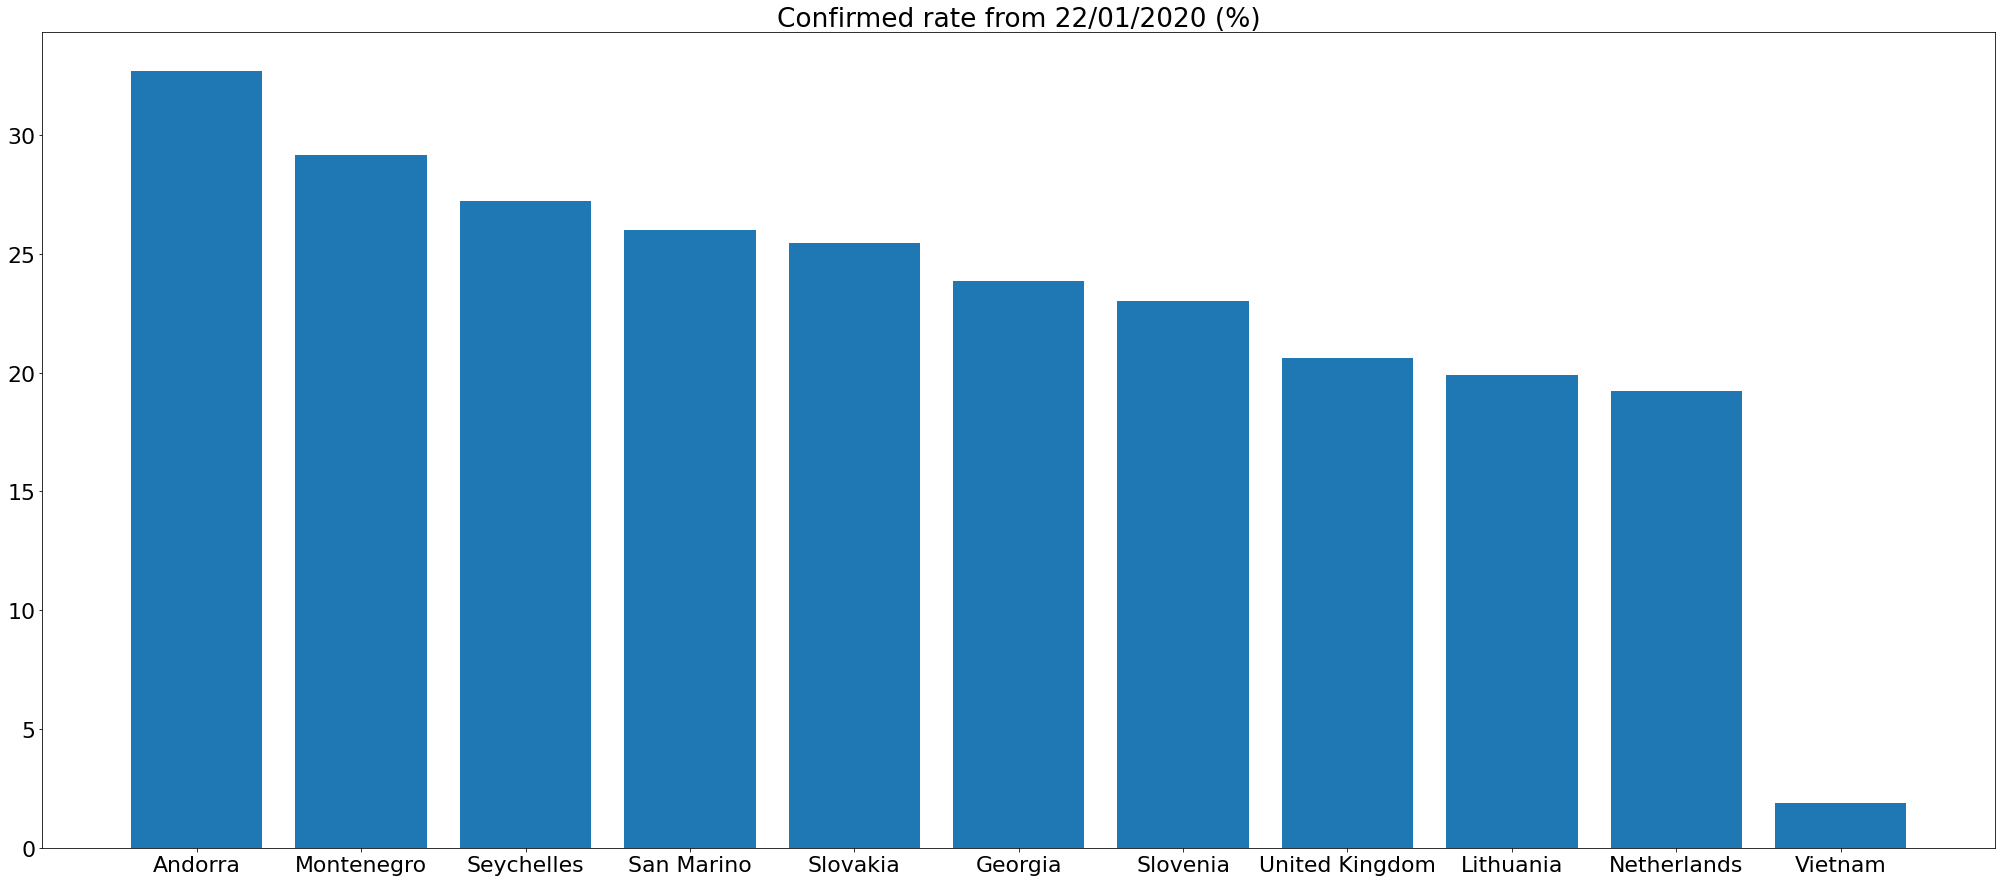

In [291]:
plt.title("Confirmed rate from 22/01/2020 (%)")
df6 = confirmed_population.sort_values('confirmed_rate',ascending = False).head(10)
entry = confirmed_population.loc[confirmed_population['Country/Region'] == 'Vietnam']
df6 = pd.concat([df6,entry])

# Make a random dataset:
height = df6["confirmed_rate"]
bars = df6["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

# Region

In [292]:
location = pd.read_csv("countryContinent.csv", encoding= 'unicode_escape')
location["country"] = location["country"].replace("United States", 'US')
location

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [293]:
confirmed_location = pd.merge(confirmed, location, left_on='Country/Region', right_on='country')
confirmed_location

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,Total,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,158275,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Albania,0,0,0,0,0,0,0,0,0,...,213257,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,220825,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,25289,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
4,Angola,0,0,0,0,0,0,0,0,0,...,87625,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Uzbekistan,0,0,0,0,0,0,0,0,0,...,199507,Uzbekistan,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,142.0,143.0
165,Vanuatu,0,0,0,0,0,0,0,0,0,...,7,Vanuatu,VU,VUT,548,ISO 3166-2:VU,Oceania,Melanesia,9.0,54.0
166,Yemen,0,0,0,0,0,0,0,0,0,...,10152,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
167,Zambia,0,0,0,0,0,0,0,0,0,...,274087,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [294]:
confirmed_location_continent_group = confirmed_location.groupby(by=["continent"],as_index=False).sum()
confirmed_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,...,-9992,-17040,3618,25821,-212,4980,9698431,22440,98.0,684.0
1,Americas,0,0,0,0,1,-1,1,-1,0,...,-76916,-11322,56184,116398,-31545,46456,49806387,11230,608.0,552.0
2,Asia,554,-458,184,212,182,131,1838,-2058,1479,...,282,250,25051,37866,62433,49894,75999693,16170,5396.0,3499.0
3,Europe,0,0,2,-1,-1,1,3,-2,-2,...,-111899,-308704,578883,136090,135999,-244416,66356601,15897,5850.0,4384.0
4,Oceania,0,0,0,0,4,-3,-1,1,2,...,53142,-31267,15977,25868,4595,2252,868975,5191,99.0,615.0


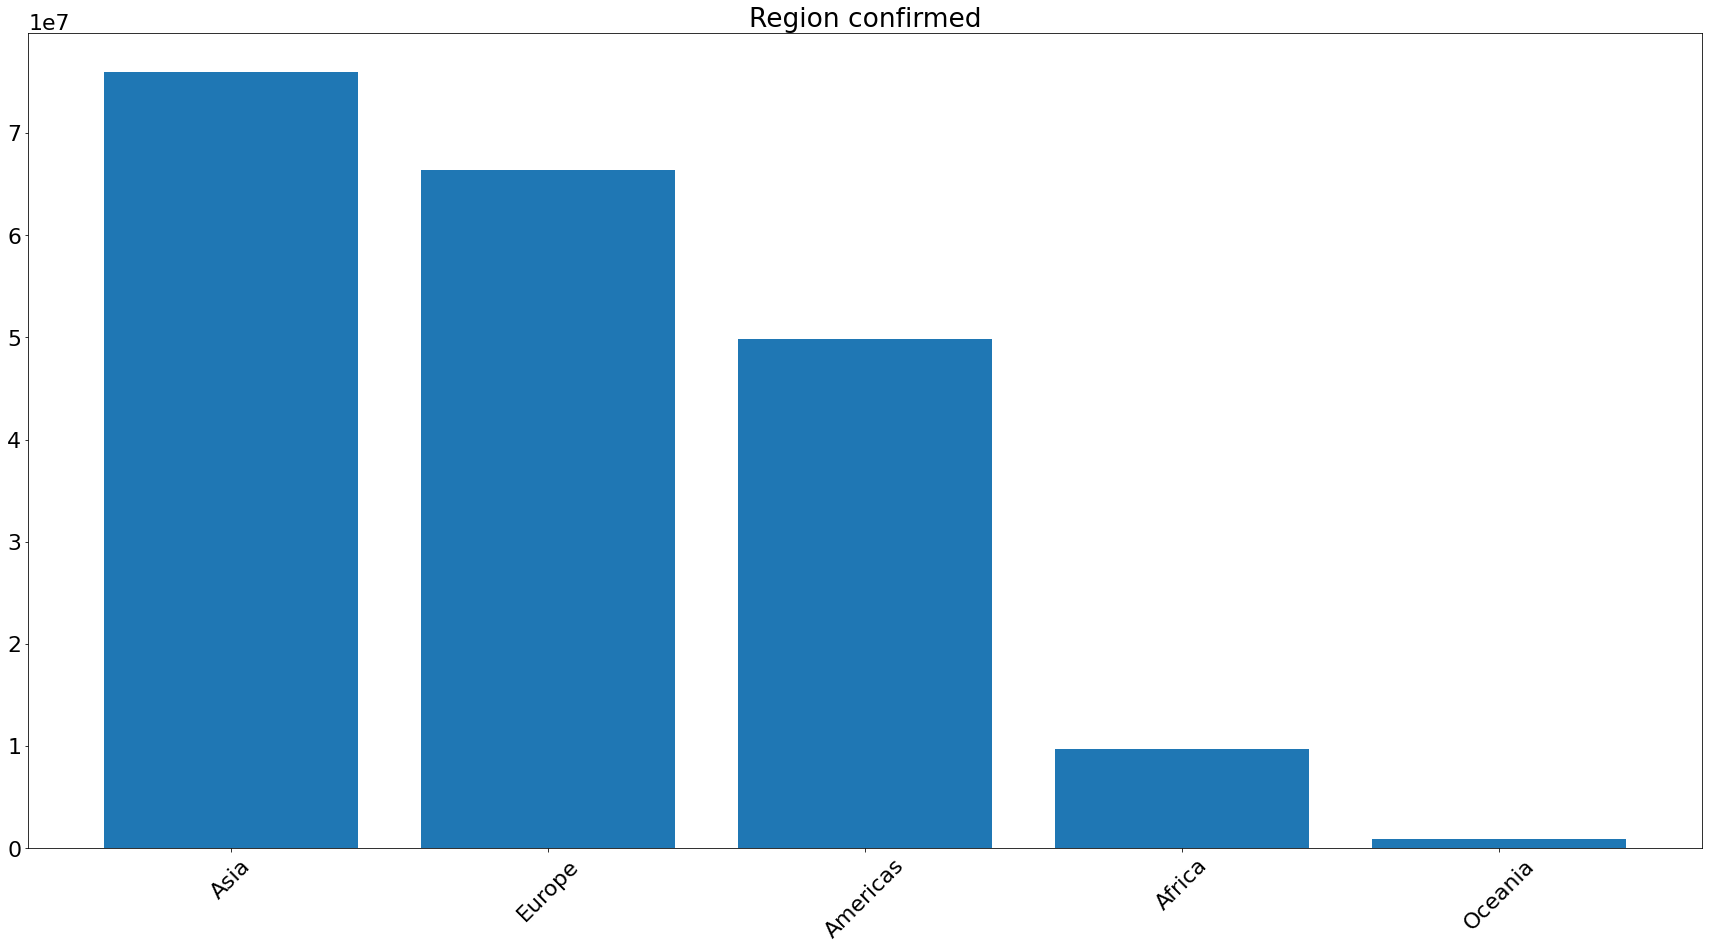

In [295]:
plt.title("Region confirmed")
df9 = confirmed_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df9["Total"]
bars = df9["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

In [296]:
confirmed_population_location = pd.merge(confirmed_population, location, left_on='Country/Region', right_on='country')
confirmed_population_location_continent_group = confirmed_population_location.groupby(by=["continent"],as_index=False).sum()
confirmed_population_location_continent_group["confirmed_rate"] = confirmed_population_location_continent_group["Total"]/confirmed_population_location_continent_group["2021_last_updated"]*100

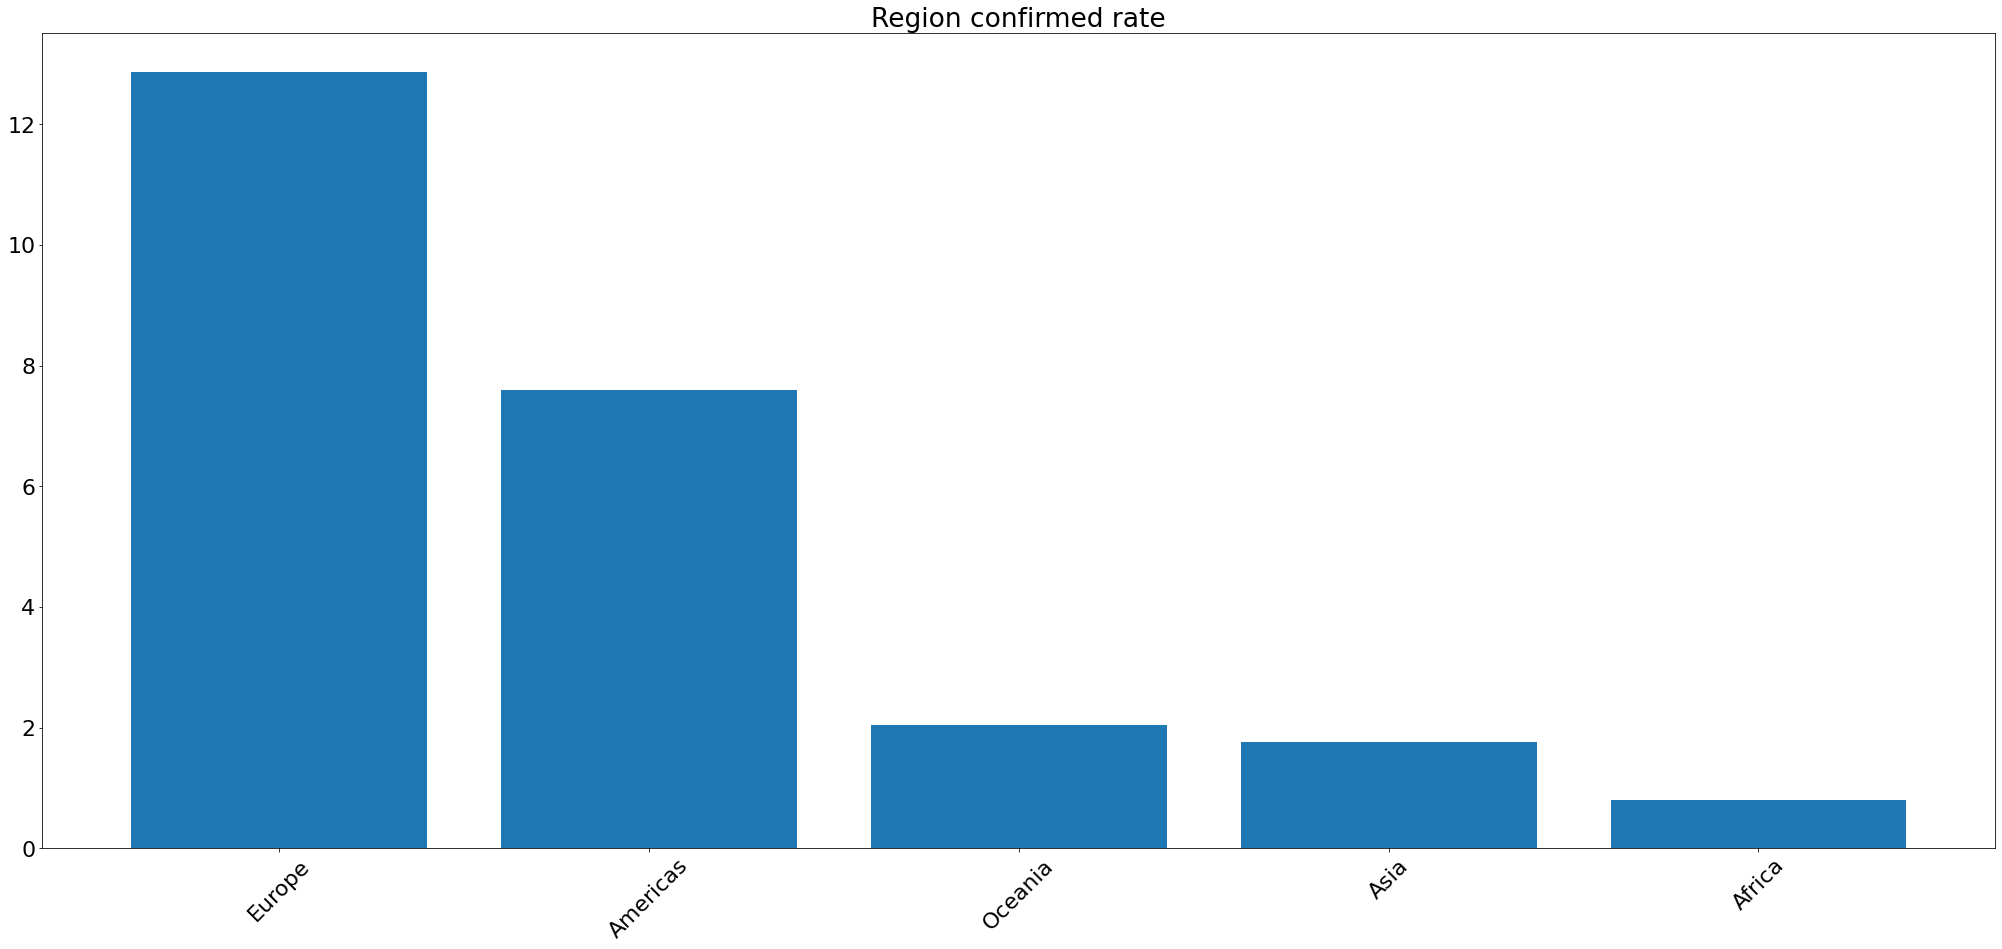

In [297]:
plt.title("Region confirmed rate")
df11 = confirmed_population_location_continent_group.sort_values('confirmed_rate',ascending = False)

# Make a random dataset:
height = df11["confirmed_rate"]
bars = df11["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

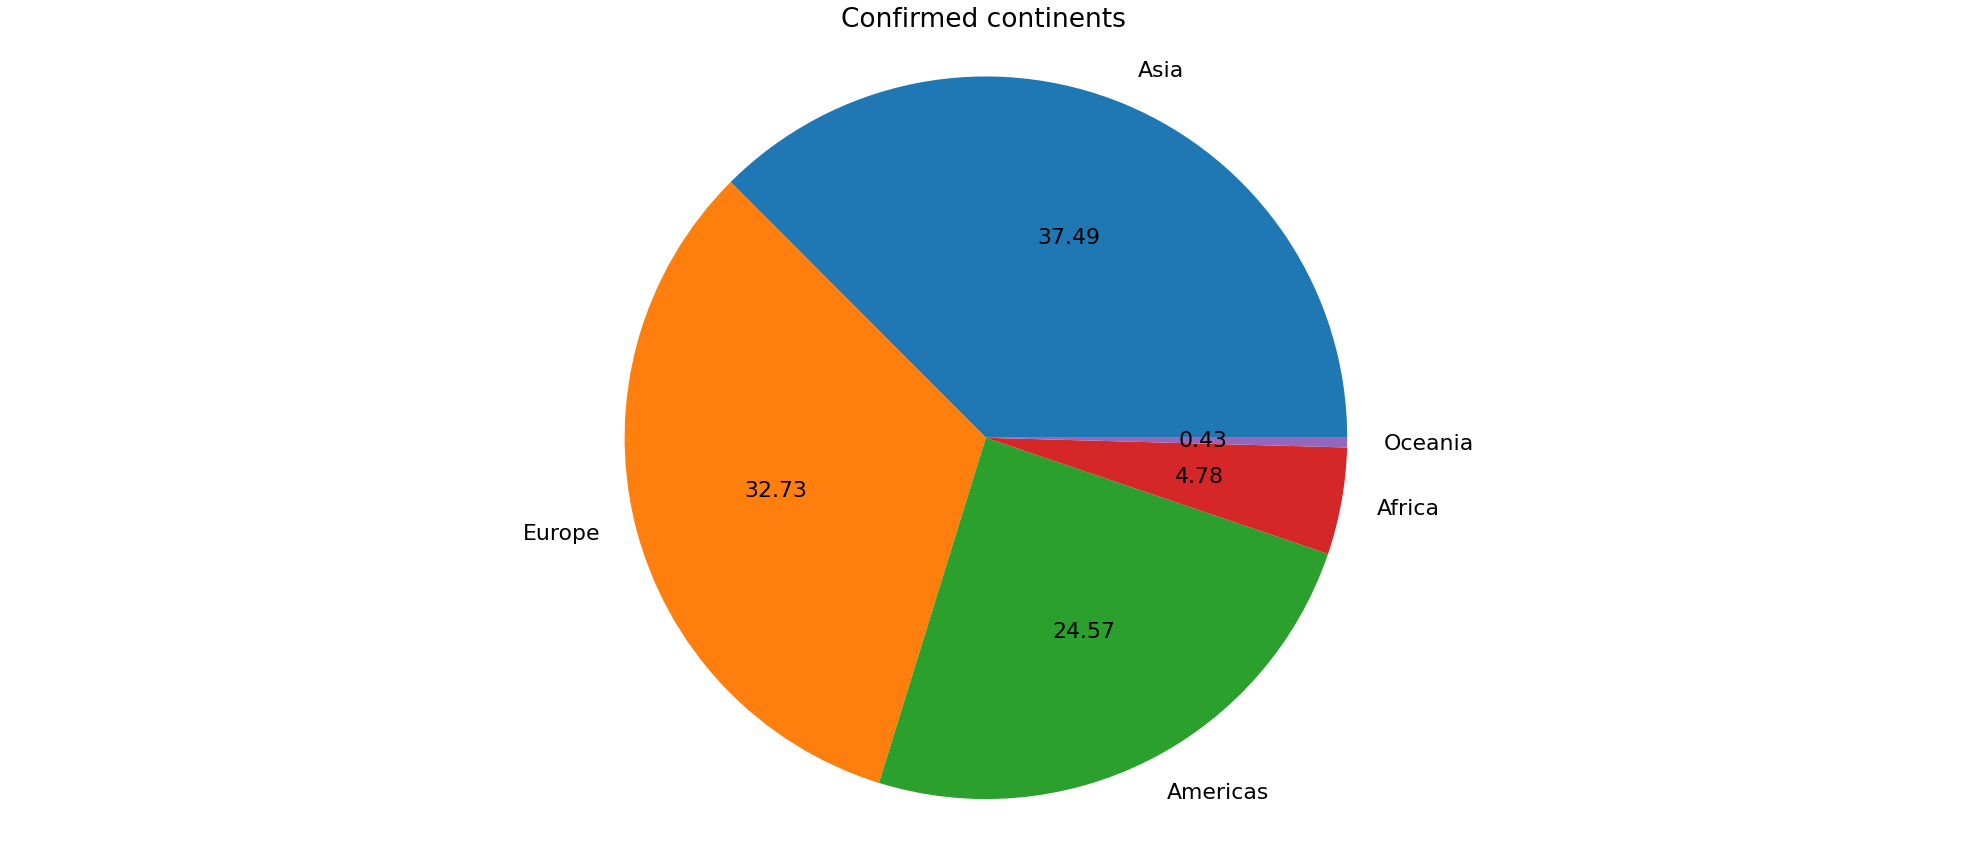

In [298]:
labels = df9["continent"]
sizes = df9["Total"]

def absolute_value(val):
    return np.round(val,2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Confirmed continents")
plt.axis('equal')
plt.show()

# Asia region

In [299]:
confirmed_location_subregion_group = confirmed_location[confirmed_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
confirmed_location_subregion_group

,sub_region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,Total,country_code,region_code,sub_region_code
0,Central Asia,0,0,0,0,0,0,0,0,0,...,-4,-541,766,-748,592,-384,1476520,2437,568.0,572.0
1,Eastern Asia,550,-455,182,209,185,131,1833,-2057,1480,...,514,-545,851,352,1429,1228,2249600,1044,426.0,90.0
2,South-Eastern Asia,4,-3,2,2,-2,-1,6,-5,2,...,713,395,-802,2141,2730,16641,12599146,3634,994.0,245.0
3,Southern Asia,0,0,0,1,-1,1,-1,0,1,...,4669,6386,3769,21427,33086,26839,39796013,2190,1136.0,272.0
4,Western Asia,0,0,0,0,0,0,0,4,-4,...,-5610,-5445,20467,14694,24596,5570,19878414,6865,2272.0,2320.0


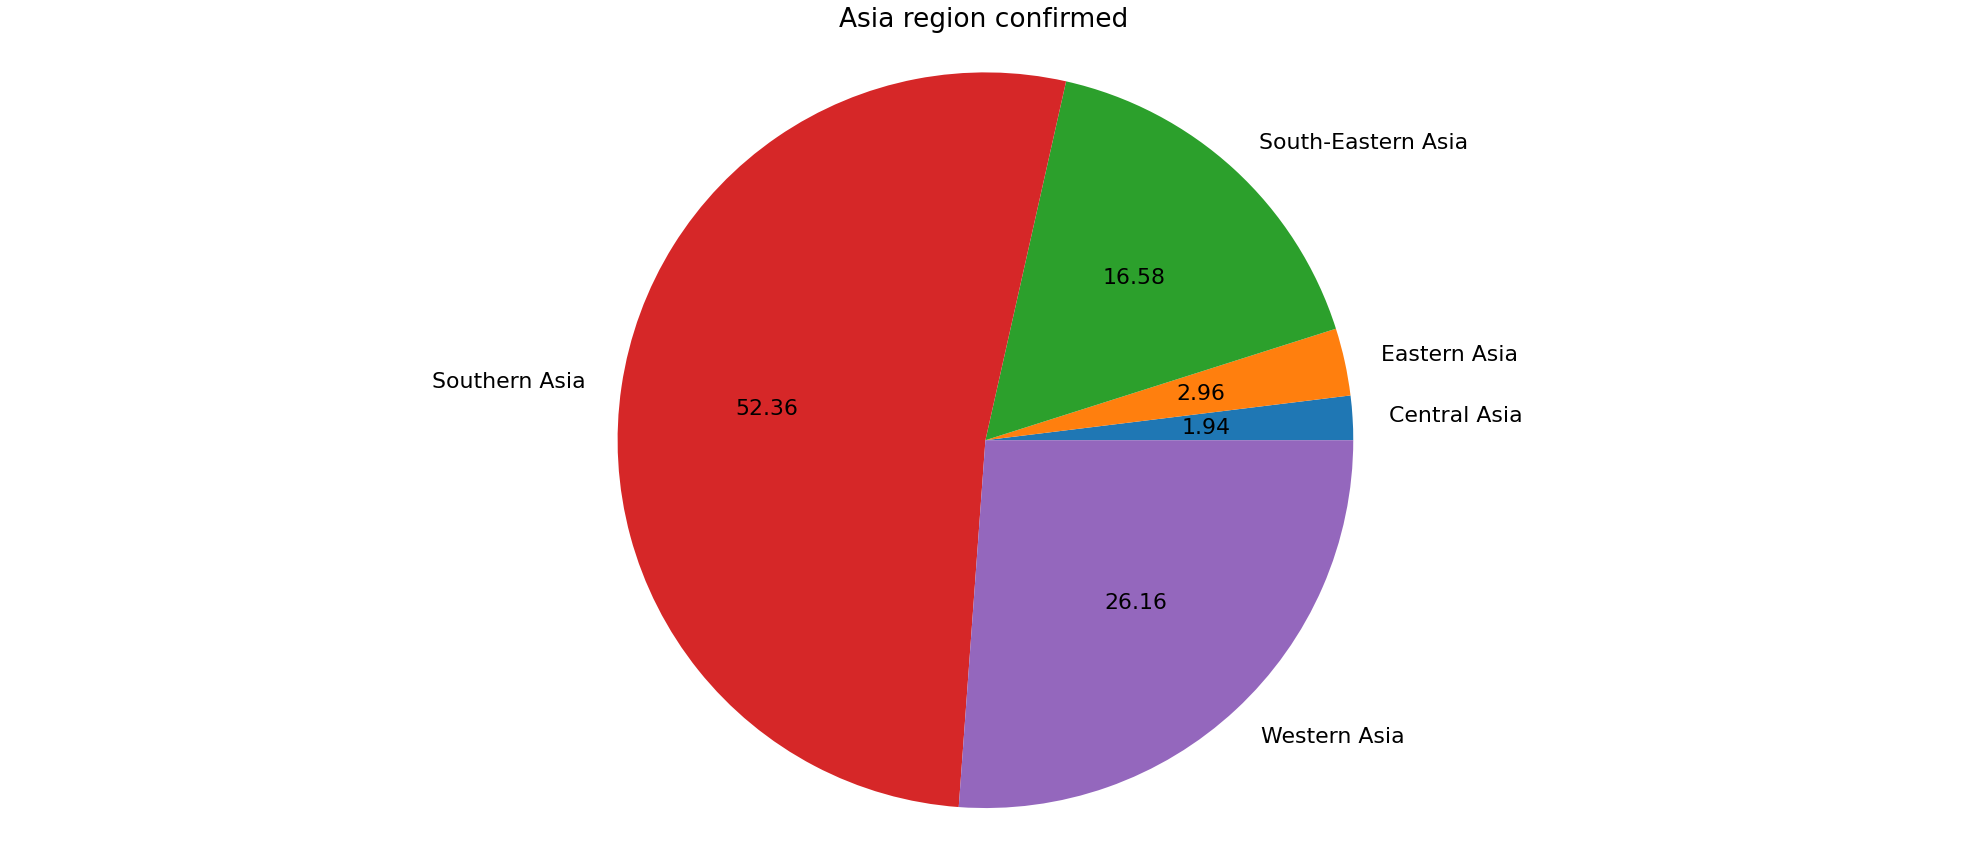

In [300]:
labels = confirmed_location_subregion_group["sub_region"]
sizes = confirmed_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region confirmed")
plt.axis('equal')
plt.show()

In [301]:
death_location = pd.merge(death, location, left_on='Country/Region', right_on='country')
death_location_continent_group = death_location.groupby(by=["continent"],as_index=False).sum()
death_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,...,174,146,246,372,278,771,225568,22440,98.0,684.0
1,Americas,0,0,0,0,0,0,0,0,0,...,303,239,323,561,408,405,1565400,11230,608.0,552.0
2,Asia,17,1,8,16,14,26,49,2,38,...,635,432,471,944,676,720,1065870,16170,5396.0,3499.0
3,Europe,0,0,0,0,0,0,0,0,0,...,1316,691,1888,2353,2753,2063,1033325,15897,5850.0,4384.0
4,Oceania,0,0,0,0,0,0,0,0,0,...,11,9,6,20,14,20,3668,5191,99.0,615.0


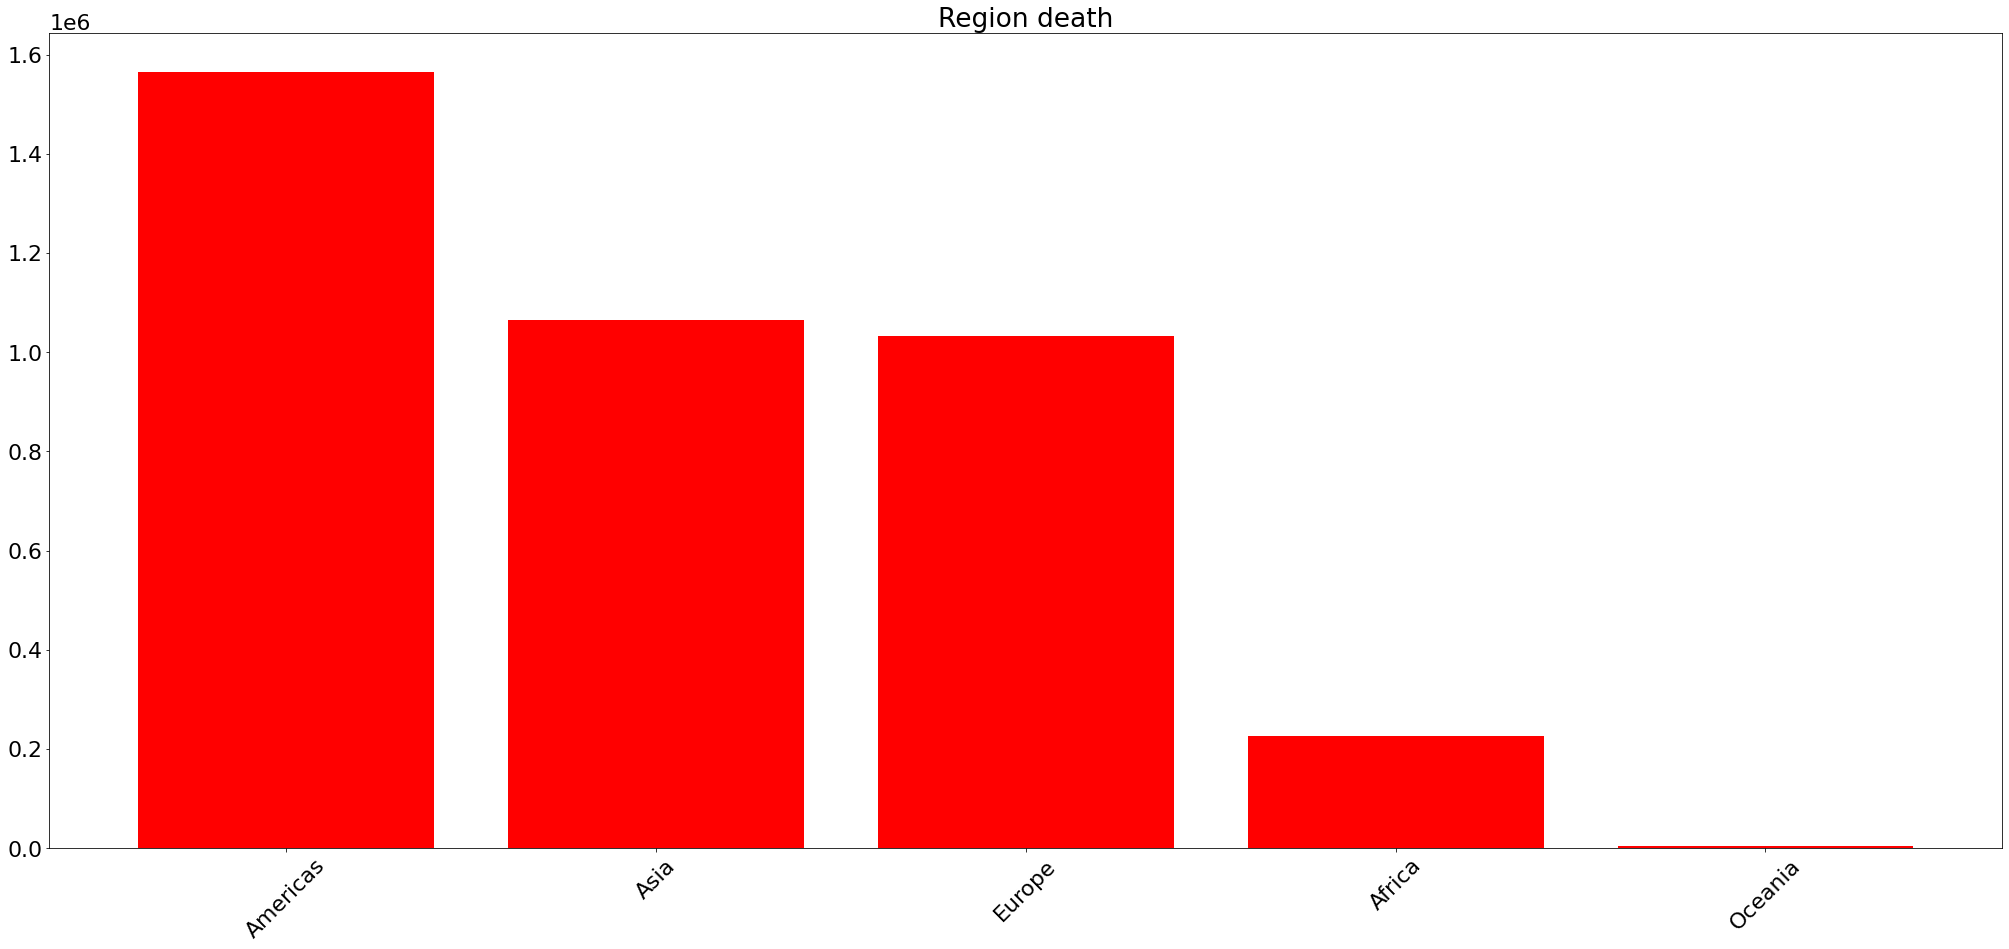

In [302]:
plt.title("Region death")
df10 = death_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df10["Total"]
bars = df10["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'r')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

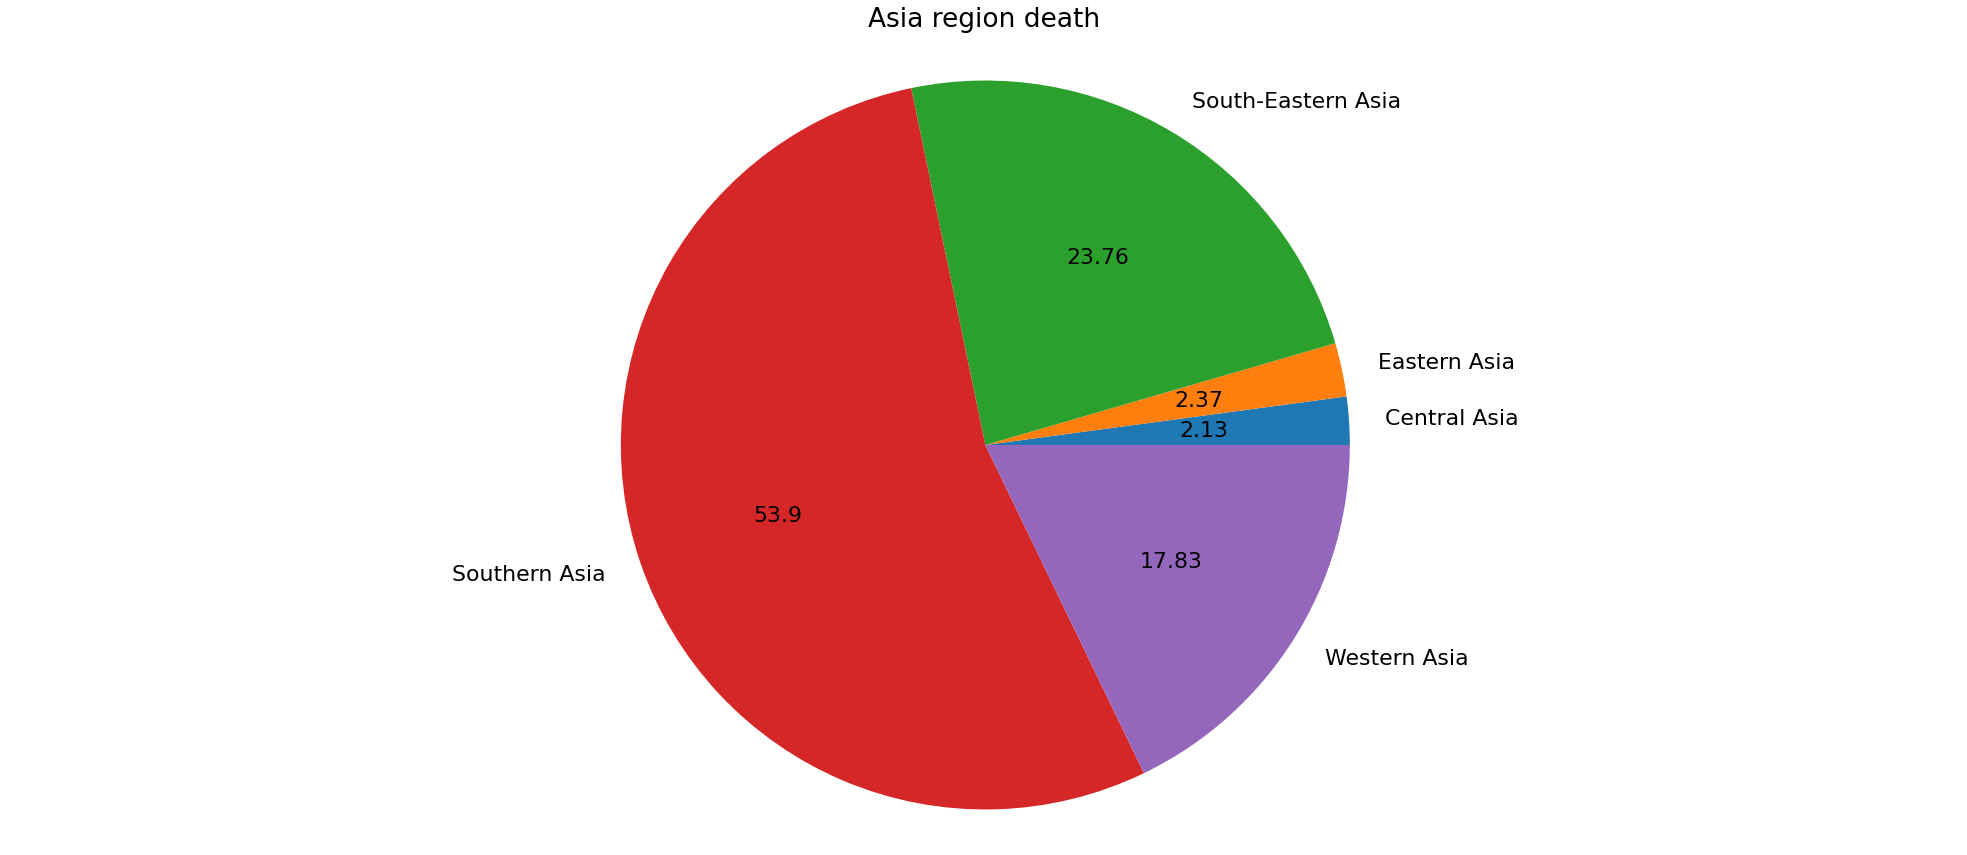

In [303]:
death_location_subregion_group = death_location[death_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
labels = death_location_subregion_group["sub_region"]
sizes = death_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region death")
plt.axis('equal')
plt.show()

## Vietnam time series

In [304]:
confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,Total
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8,-20,9,-5,59,-88,28,18,-10,158275
1,Albania,0,0,0,0,0,0,0,0,0,...,-96,-547,1325,-1325,661,-661,1136,-1136,1236,213257
2,Algeria,0,0,0,0,0,0,0,0,0,...,47,8,5,-9,-45,32,48,41,-52,220825
3,Andorra,0,0,0,0,0,0,0,0,0,...,75,16,319,-618,0,762,-462,187,-487,25289
4,Angola,0,0,0,0,0,0,0,0,0,...,-3347,-292,326,-917,-283,322,58,1068,-981,87625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,0,2,-2,0,0,0,0,0,0,...,-551,5979,-3353,-1680,2113,-1012,5792,-4711,8825,1843563
192,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,-537,-296,0,0,0,0,1342,-1018,-324,471414
193,Yemen,0,0,0,0,0,0,0,0,0,...,-3,-1,-1,1,2,5,-3,-2,3,10152
194,Zambia,0,0,0,0,0,0,0,0,0,...,1348,300,-474,-1407,-1945,-185,2714,254,-416,274087


In [305]:
vn_cf_timesr = confirmed.loc[confirmed['Country/Region'] == "Vietnam"]
vn_d_timesr = death.loc[confirmed['Country/Region'] == "Vietnam"]
vn_r_timesr = recovered.loc[confirmed['Country/Region'] == "Vietnam"]

In [306]:
vn_cf_timesr = vn_cf_timesr.drop('Country/Region', 1)
vn_cf_timesr = vn_cf_timesr.drop('Total', 1)
vn_d_timesr = vn_d_timesr.drop('Country/Region', 1)
vn_d_timesr = vn_d_timesr.drop('Total', 1)
vn_r_timesr = vn_r_timesr.drop('Country/Region', 1)
vn_r_timesr = vn_r_timesr.drop('Total', 1)


In [307]:
vn_cf_timesr_lst = vn_cf_timesr.values.flatten().tolist()
vn_d_timesr_lst = vn_d_timesr.values.flatten().tolist()
vn_r_timesr_lst = vn_r_timesr.values.flatten().tolist()

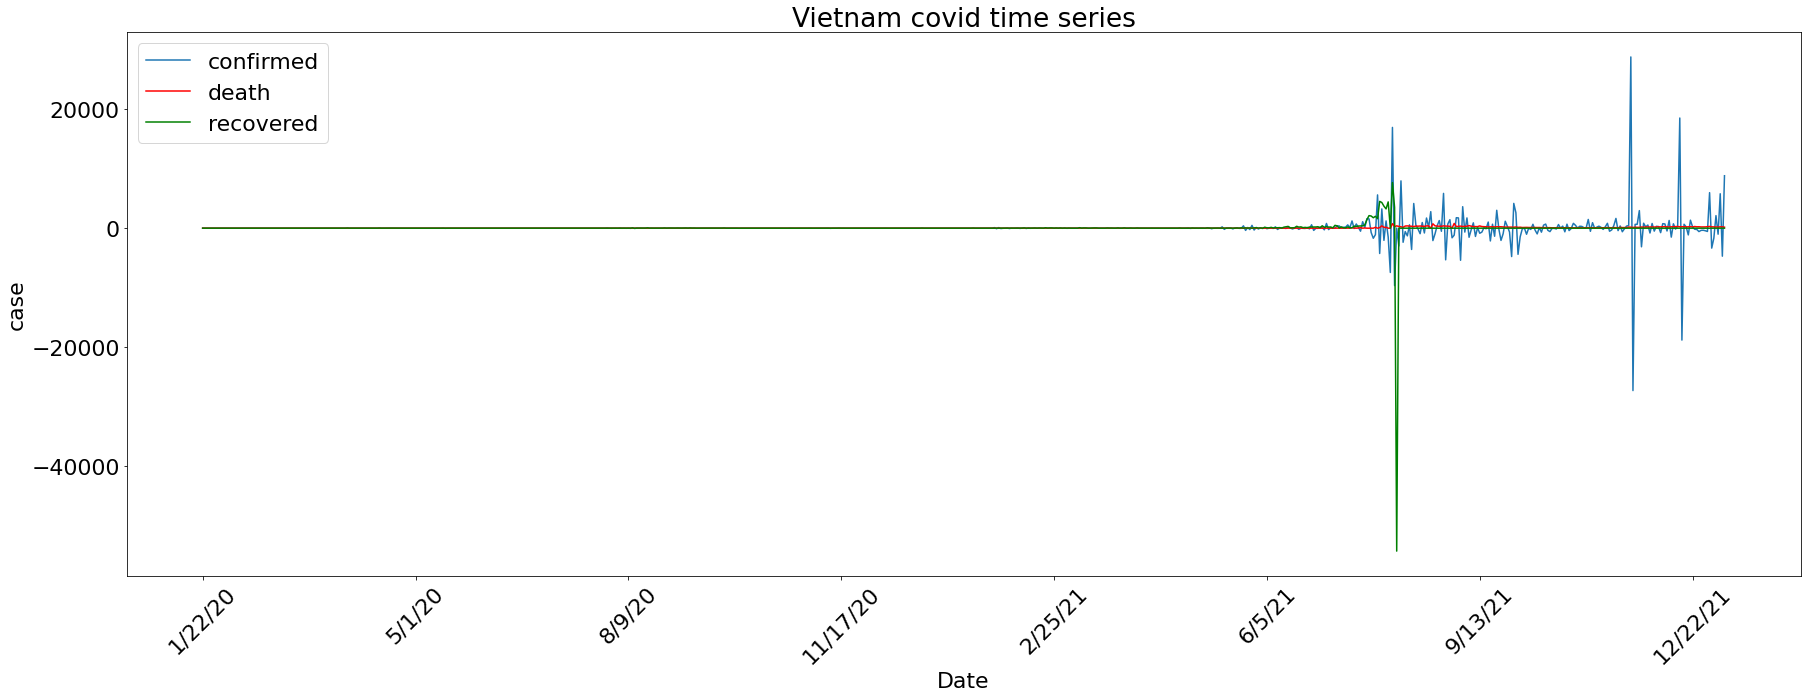

In [308]:
x = vn_d_timesr.columns
plt.figure(figsize=(30, 10))
plt.plot(x, vn_cf_timesr_lst, label='confirmed')  # Plot some data on the (implicit) axes.
plt.plot(x, vn_d_timesr_lst, label='death', color='r')  # etc.
plt.plot(x, vn_r_timesr_lst, label='recovered', color='g')
ax = plt.gca()
ax.axes.xaxis.set_ticks([i for i in range(len(x) + 1) if i % 100 ==0])
plt.xticks(rotation=45)
plt.xlabel('Date',)
plt.ylabel('case')
plt.title("Vietnam covid time series")
plt.legend();

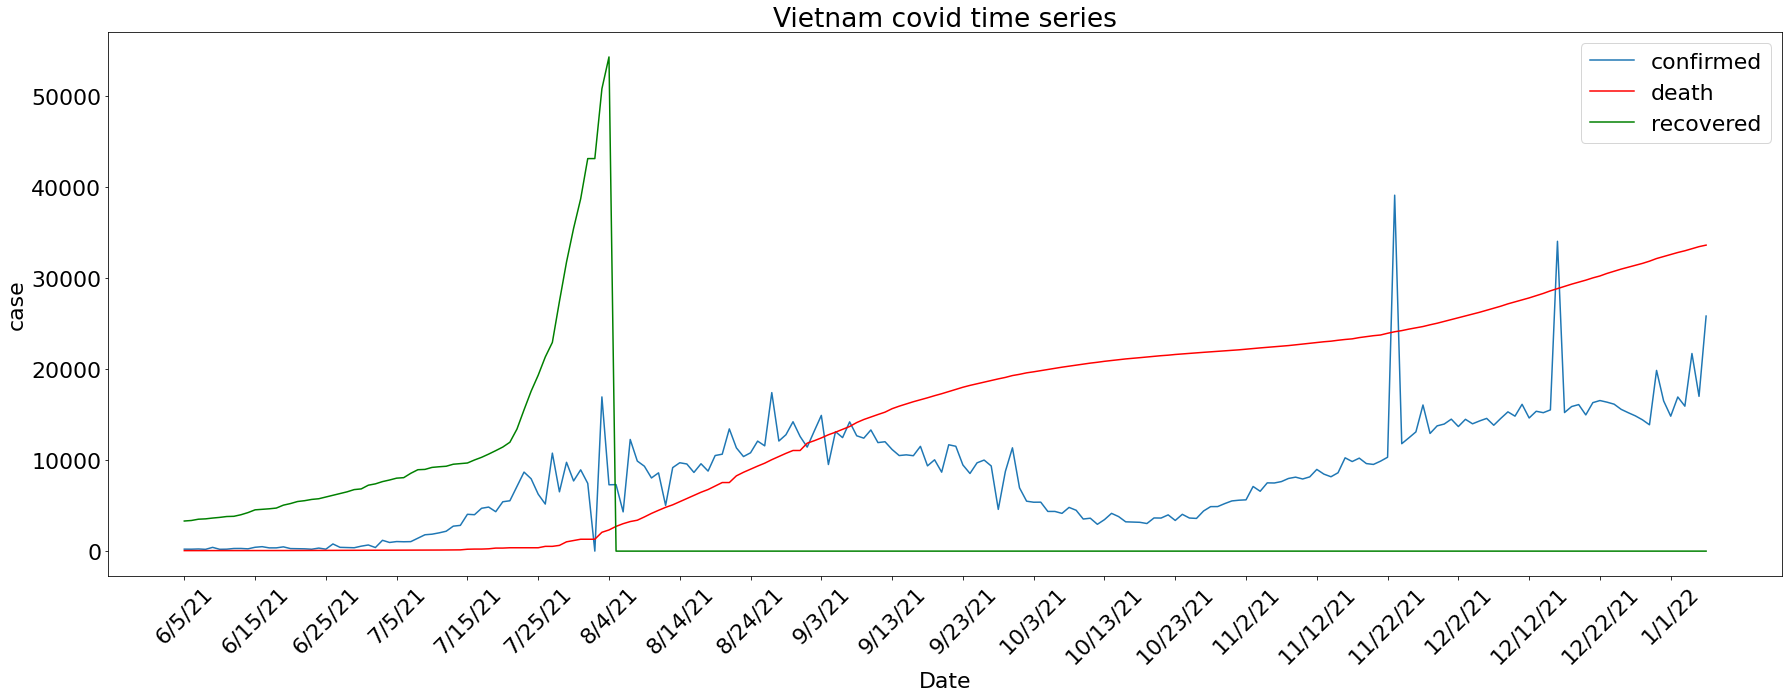

In [273]:
start = 500
x = vn_d_timesr.columns[start:]
plt.figure(figsize=(30, 10))
plt.plot(x, vn_cf_timesr_lst[start:], label='confirmed')  # Plot some data on the (implicit) axes.
plt.plot(x, vn_d_timesr_lst[start:], label='death', color='r')  # etc.
plt.plot(x, vn_r_timesr_lst[start:], label='recovered', color='g')
ax = plt.gca()
ax.axes.xaxis.set_ticks([i for i in range(len(x) + 1) if i % 10 ==0])
plt.xticks(rotation=45)
plt.xlabel('Date',)
plt.ylabel('case')
plt.title("Vietnam covid time series")
plt.legend();

In [91]:
x = np.arange(len(vn_cf_timesr_lst)).tolist()
y = vn_cf_timesr_lst

def extractDigits(lst):
    return list(map(lambda el:[el], lst))

x = extractDigits(x)
y = extractDigits(y)

In [92]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [94]:
confirmed_vn = confirmed.drop("Total",1)
confirmed_vn= confirmed_vn[confirmed_vn["Country/Region"] == "Vietnam"]
confirmed_vn = confirmed_vn.drop("Country/Region",1)
confirmed_vn_t = confirmed_vn.T
confirmed_vn_t = confirmed_vn_t.rename(columns={"191": "confirmed"})
confirmed_vn_t

,191
1/22/20,0
1/23/20,2
1/24/20,2
1/25/20,2
1/26/20,2
...,...
1/1/22,1746092
1/2/22,1763040
1/3/22,1778976
1/4/22,1800704


In [55]:
doses_admin = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/vaccine_doses_admin{}.csv".format(str(date.today()))).toPandas()
# doses_admin.set_index("Country_Region")
# doses_admin=doses_admin.astype(dict.fromkeys(doses_admin.columns[1:], 'int64'),errors='ignore')
# doses_admin = doses_admin.groupby(by=["Country_Region"],as_index=False).sum()
doses_admin = doses_admin.drop('UID', 1)
doses_admin = doses_admin.drop('iso2', 1)
doses_admin = doses_admin.drop('iso3', 1)
doses_admin = doses_admin.drop('code3', 1)
doses_admin = doses_admin.drop('FIPS', 1)
doses_admin = doses_admin.drop('Admin2', 1)
doses_admin = doses_admin.drop('Province_State', 1)
doses_admin = doses_admin.drop('Lat', 1)
doses_admin = doses_admin.drop('Long_', 1)
doses_admin = doses_admin.drop('Combined_Key', 1)
doses_admin = doses_admin.fillna(value=0)
doses_admin=doses_admin.astype(dict.fromkeys(doses_admin.columns[1:], 'int64'),errors='ignore')
doses_admin.dtypes
doses_admin = doses_admin.groupby(by=["Country_Region"],as_index=False).sum()
doses_admin

,Country_Region,Population,2020-12-12,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,...,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
0,Afghanistan,38928341,0,0,0,0,0,0,0,0,...,5228706,5228706,5228706,5228706,5228706,5228706,5228706,4674518,4674518,4674518
1,Albania,2877800,0,0,0,0,0,0,0,0,...,2286235,2316606,2316606,2316606,2316606,2316606,2316606,2316606,2385048,2385048
2,Algeria,43851043,0,0,0,0,0,0,0,0,...,12545356,12545356,12545356,12545356,12545356,12545356,12545356,12545356,12545356,12545356
3,Andorra,77265,0,0,0,0,0,0,0,0,...,115709,115709,115709,115709,115709,115709,115709,115709,117246,117246
4,Angola,32866268,0,0,0,0,0,0,0,0,...,11164918,11164918,11164918,11615144,11615144,11615144,11615144,11615144,11615144,11797041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Vietnam,97338583,0,0,0,0,0,0,0,0,...,146335052,148198862,148198862,148198862,148198862,148198862,148198862,154344391,154344391,156902083
186,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,3315774,3315774,3315774,3315774,3315774,3315774,3315774,3315774,3383211,3383211
187,Yemen,0,0,0,0,0,0,0,0,0,...,786027,786027,786027,786027,786027,786027,786027,786027,786027,786027
188,Zambia,0,0,0,0,0,0,0,0,0,...,1597020,1669400,1669400,1669400,1730165,1730165,1730165,1793721,1816154,1842432


In [145]:
vaccine = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/covid19_vaccine{}.csv".format(str(date.today()))).toPandas()
vaccine = vaccine.fillna(value=0)
# vaccine=vaccine.astype(dict.fromkeys(vaccine.columns[2:5], 'int64'),errors='ignore')
vaccine=vaccine.drop('Province_State',1)
vaccine=vaccine.drop('Report_Date_String',1)
vaccine=vaccine.drop('UID', 1)

In [156]:
vietnam_vaccine=vaccine[vaccine["Country_Region"]=="Vietnam"]
vietnam_vaccine['Date'] =  pd.to_datetime(vietnam_vaccine['Date'], format='%Y-%m-%d')
vietnam_vaccine
# vietnam_vaccine['year']=pd.DatetimeIndex(vietnam_vaccine['Date']).year

<ipython-input-156-98a383cfdd7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_vaccine['Date'] =  pd.to_datetime(vietnam_vaccine['Date'], format='%Y-%m-%d')


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
5358,Vietnam,2021-03-07,0,0,0
5482,Vietnam,2021-03-08,377,377,0
5610,Vietnam,2021-03-09,522,522,0
5739,Vietnam,2021-03-10,955,955,0
5868,Vietnam,2021-03-11,1585,1585,0
...,...,...,...,...,...
139654,Vietnam,2022-01-02,148198862,77358030,56385381
140356,Vietnam,2022-01-03,148198862,77796499,56385381
141058,Vietnam,2022-01-04,154344391,77850611,56385381
141760,Vietnam,2022-01-05,154344391,77850611,56385381


In [180]:
vietnam_vaccine['year']=pd.DatetimeIndex(vietnam_vaccine['Date']).year
vietnam_vaccine['month']=pd.DatetimeIndex(vietnam_vaccine['Date']).month
vietnam_vaccine['year-month']=vietnam_vaccine['year'].astype(str)+'-'+vietnam_vaccine['month'].astype(str)
# vietnam_vaccine.groupby(['year-month']).sum()
vietnam_vaccine_month=vietnam_vaccine.groupby(['year-month'],as_index=False)['Doses_admin', 'People_partially_vaccinated', 'People_fully_vaccinated'].agg('sum')

<ipython-input-180-9555aecfd9e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_vaccine['year']=pd.DatetimeIndex(vietnam_vaccine['Date']).year
<ipython-input-180-9555aecfd9e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_vaccine['month']=pd.DatetimeIndex(vietnam_vaccine['Date']).month
<ipython-input-180-9555aecfd9e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [182]:
# sns.barplot(x="month",
#            y="Doses_admin",
#            data=vietnam_vaccine_month)
# plt.show()
# vietnam_vaccine_month=vietnam_vaccine_month.astype({'year-month': 'int64'},errors='ignore')
vietnam_vaccine_month['year-month'] =  pd.to_datetime(vietnam_vaccine_month['year-month'], format='%Y-%m')
# vietnam_vaccine_month["date"]=vietnam_vaccine_month['year-month']
# vietnam_vaccine_month["date"]=pd.to_datetime(vietnam_vaccine_month['year-month'], format='%Y-%m')
vietnam_vaccine_month=vietnam_vaccine_month.sort_values(by=['year-month'])
# vietnam_vaccine_month=vietnam_vaccine_month.sort_index()
vietnam_vaccine_month

,year-month,Doses_admin,People_partially_vaccinated,People_fully_vaccinated
3,2021-03-01,649584,649584,0
4,2021-04-01,4089990,4089990,0
5,2021-05-01,25443899,26298153,635222
6,2021-06-01,60362594,58461679,2645532
7,2021-07-01,134617005,124900434,9948949
8,2021-08-01,424983755,380832309,44660650
9,2021-09-01,901746632,738876897,166400406
0,2021-10-01,1885690585,1364625691,531688358
1,2021-11-01,3002886882,1925051679,1080283457
2,2021-12-01,4202733864,2326204958,1712636846


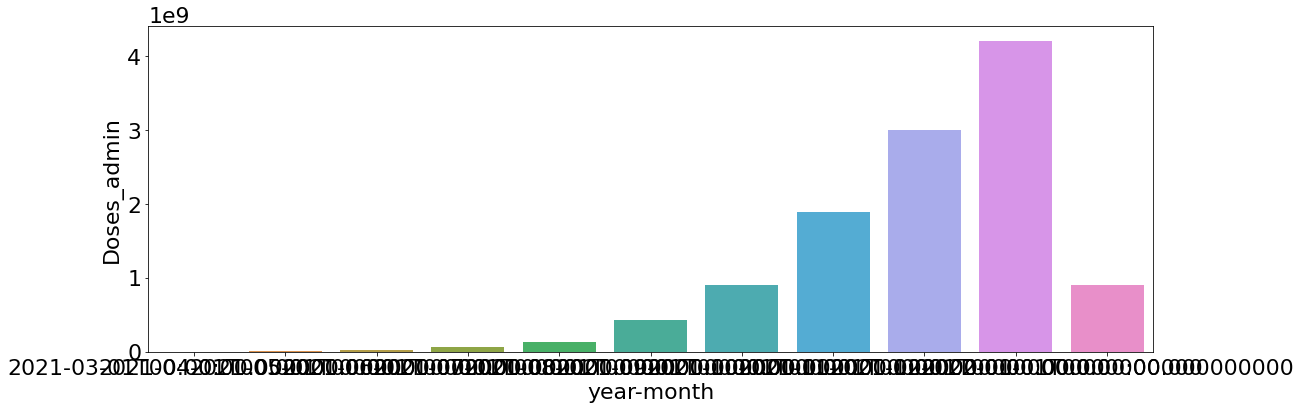

In [183]:
plt.figure(figsize=(18,6))
sns.barplot(x="year-month", y='Doses_admin',data=vietnam_vaccine_month)
plt.show()
